# Deep Learning for Image Processing using Keras
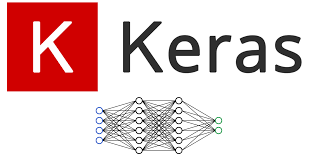

In [29]:
# How to use Keras for Image Processing
# !pip install tensorflow

#Import Deep Learning Library : Tensorflow and Keras
import tensorflow as tf
from tensorflow import keras
from keras import backend as b

#Import Deep Learning Dataset
from keras.datasets import mnist

#Import Deep Learning Models
from keras.models import Sequential

#Import Deep Learning Layers
from keras.layers import Conv2D,Convolution2D,Dense,Dropout,Flatten,MaxPool2D,Activation

#Import pandas and numpy
import pandas as pd
import numpy as np

# Preprocessing
from keras import utils
from keras.utils import to_categorical
from keras.utils import normalize

from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt

## 1. Import MNIST Datasets

In [2]:
(XTrain,YTrain),(XTest,YTest)=mnist.load_data()

In [3]:
XTrain.shape,YTrain.shape,XTest.shape,YTest.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

There are 60,000 images with a pixel size of 28 x 28 for training and 10,000 images for testing

## 2. Understand the data

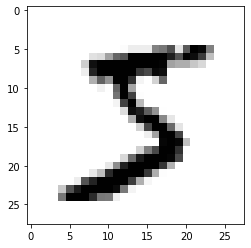

In [4]:
#Plot the first 28 x 28 frame of data
plt.imshow(XTrain[0],cmap='binary')

The list of data points below represent the image we see above

In [5]:
XTrain[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [6]:
YTrain[0]

5

Corresponding to each image, we have a Target assigned to it (Supervised Learning)

In [7]:
len(XTrain[0]),len(XTrain[0][0])

(28, 28)

Each row contains 28 lists with each list having 28 data points. So our image columns and rows are 28 x 28

In [8]:
img_cols,img_rows=28,28

We observe that the data has a single dimension which indicates lack of color element. This is BW dataset with maximum value of 255 <br>
We can use this information to normlize the dataset :
- Simply divide data set by 255
- Use the Keras.utils.normalize function 

In [9]:
# XTrain_div=XTrain/255
# XTest_div=XTest/255

XTrain_keras=keras.utils.normalize(XTrain)
XTest_keras=keras.utils.normalize(XTest)

In [10]:
# b.image_data_format()

Using the Target values Y and applying one-hot encoding using the to_categorical function of keras

In [11]:
YTest=to_categorical(YTest,10)
YTrain=to_categorical(YTrain,10)

In [12]:
YTrain.shape,YTest.shape

((60000, 10), (10000, 10))

## 3. Building a Neural Network using Keras

In [13]:
model=Sequential()

#Neural Network Build
#Input Layer
model.add(Flatten())

#Hidden Layer
model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))

#Output Layer (n= number of classes)
model.add(Dense(10,activation='softmax'))

# model.compile()

In [14]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [15]:
model.fit(XTrain_keras,YTrain,batch_size=32,epochs=3,verbose=1)
# Batch_size = size of each bacth Gradent Decent Concept : Batch, Mini Batch , Each datapoint
# Batch Size 32 is default

Epoch 1/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2606 - accuracy: 0.9212
Epoch 2/3
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1044 - accuracy: 0.9680
Epoch 3/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0732 - accuracy: 0.9767


We can also incorporate the testing/evaluation part of our model using the fit function as well as shown below

In [16]:
model.fit(XTrain_keras,YTrain,batch_size=32,epochs=3,verbose=1,validation_data=[XTest_keras,YTest])

Epoch 1/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0546 - accuracy: 0.9825 - val_loss: 0.0747 - val_accuracy: 0.9782
Epoch 2/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0426 - accuracy: 0.9861 - val_loss: 0.0953 - val_accuracy: 0.9723
Epoch 3/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0353 - accuracy: 0.9875 - val_loss: 0.0822 - val_accuracy: 0.9771


In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


We can also save our model 

# 4. Predicting using Sequential Model

In [18]:
YPred=model.predict(XTest_keras)
YPred

313/313 [==============================] - 0s 1ms/step


array([[7.95185073e-09, 3.72786175e-08, 9.59551471e-05, ...,
        9.99903798e-01, 1.35056644e-09, 4.16507326e-08],
       [1.78439421e-07, 2.02117972e-05, 9.99761641e-01, ...,
        8.72036168e-08, 2.17620822e-04, 3.14869170e-13],
       [2.55601495e-11, 9.99978423e-01, 5.89206408e-08, ...,
        1.32593077e-05, 1.69943758e-06, 3.71006053e-07],
       ...,
       [7.84376429e-14, 8.80800544e-10, 1.05573601e-12, ...,
        9.40274916e-08, 7.99056110e-09, 5.86309852e-07],
       [5.83647264e-08, 8.14709082e-08, 7.88266896e-10, ...,
        6.15948348e-10, 1.24486501e-03, 4.49489113e-09],
       [8.02669547e-06, 3.71561393e-11, 2.63036881e-09, ...,
        4.74922315e-12, 5.66073355e-10, 1.03660816e-10]], dtype=float32)

In [19]:
np.argmax(YPred[0])

7

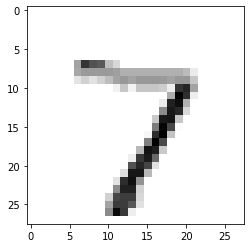

In [20]:
plt.imshow(XTest_keras[0],cmap='binary')

In [ ]:
model.save('BasicNeuralNetwork.model')

In [ ]:
newmodel=tf.keras.models.load_model('BasicNeuralNetwork.model')

In [ ]:
newmodel.summary()